# NYC Entertainemnt Analysis

## 1 Introduction

This is a comprehensive Exploratory Data Analysis for the scraped Yelp business listings with Python. The results shown in this notebook will be used for building the TripElf interactive map application.

### 1.1 Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (20.0, 10.0)

from jupyterthemes import jtplot
jtplot.style(theme='monokai')

### 1.2 Load data

We scraped Yelp bussiness listings from three categories for travelers' entertainment - restaurants, shopping and nightlife.

In [6]:
restaurants_nyc = pd.read_csv("restaurants_nyc.csv")
shopping_nyc = pd.read_csv("shopping_nyc.csv")
nightlife_nyc = pd.read_csv("nightlife_nyc.csv")

In [97]:
neighbourhoods_nyc = pd.read_csv("neighbourhoods_nyc.csv")

In [113]:
neighbourhoods_nyc.shape

(233, 5)

### 1.3 File structure and content

In [7]:
restaurants_nyc.shape, shopping_nyc.shape, nightlife_nyc.shape

((25068, 17), (14950, 17), (5169, 17))

In [8]:
restaurants_nyc.columns

Index(['bizID', 'title', 'categories', 'priceRange', 'dollarPrice', 'rating',
       'reviewCount', 'address', 'district', 'searchZipcode', 'exactZipcode',
       'latitude', 'longitude', 'phone', 'img', 'neighborhood',
       'neighborhood_group'],
      dtype='object')

In [9]:
restaurants_nyc.head()

,bizID,title,categories,priceRange,dollarPrice,rating,reviewCount,address,district,searchZipcode,exactZipcode,latitude,longitude,phone,img,neighborhood,neighborhood_group
0,amy-ruths-new-york,Amy Ruth’s,Southern;Soul Food,$11-30,$$,4,2372,113 W 116th St,Harlem,10026,10026,40.802554,-73.950268,NaN,https://s3-media3.fl.yelpcdn.com/bphoto/aX-TMD...,Harlem,Manhattan
1,lolos-seafood-shack-new-york,Lolo’s Seafood Shack,Seafood;Bars,$11-30,$$,4,584,303 W 116th St,Harlem,10026,10026,40.804819,-73.955706,(646) 649-3356,https://s3-media3.fl.yelpcdn.com/bphoto/OeueWG...,Harlem,Manhattan
2,cantina-taqueria-and-tequila-bar-new-york,Cantina Taqueria & Tequila Bar,Mexican;Latin American;Cocktail Bars,$11-30,$$,4,424,1838 7th Ave,Harlem,10026,10026,40.800306,-73.954957,(833) 698-2267,https://s3-media3.fl.yelpcdn.com/bphoto/wxiVtv...,Harlem,Manhattan
3,b2-harlem-new-york,B2 Harlem,Seafood;Wine Bars;Breakfast & Brunch,$11-30,$$,4,202,271 W 119th St,Harlem,10026,10026,40.806208,-73.953226,(212) 280-2248,https://s3-media1.fl.yelpcdn.com/bphoto/sqm2sP...,Harlem,Manhattan
4,rdv-rendezvous-new-york-3,RDV Rendezvous,French;Wine Bars;Desserts,$11-30,$$,4,127,2072 Frederick Douglass Blvd,Harlem,10026,10026,40.802041,-73.956773,(212) 222-8952,https://s3-media3.fl.yelpcdn.com/bphoto/PZ_qZQ...,Harlem,Manhattan


### 1.4 Missing values

In [10]:
restaurants_nyc.isnull().sum()

bizID                    0
title                    0
categories               2
priceRange            8971
dollarPrice           8979
rating                   0
reviewCount              0
address                  3
district               878
searchZipcode            0
exactZipcode             0
latitude                 0
longitude                0
phone                 1450
img                      0
neighborhood             0
neighborhood_group       0
dtype: int64

In [11]:
shopping_nyc.isnull().sum()

bizID                    0
title                    0
categories               0
priceRange            9381
dollarPrice           9381
rating                   0
reviewCount              0
address                 47
district               409
searchZipcode            0
exactZipcode             0
latitude                 0
longitude                0
phone                  917
img                      0
neighborhood             0
neighborhood_group       0
dtype: int64

In [12]:
nightlife_nyc.isnull().sum()

bizID                    0
title                    0
categories               1
priceRange            1217
dollarPrice           1217
rating                   0
reviewCount              0
address                  0
district               162
searchZipcode            0
exactZipcode             0
latitude                 0
longitude                0
phone                  402
img                      0
neighborhood             0
neighborhood_group       0
dtype: int64

## 2 Individual feature visualizations 

### 2.1 categories

In [14]:
def count_cat(df):
    cat_count_mapping = {}
    for catList in df["categories"].dropna().str.split(";"):
        for cat in catList:
            if cat not in cat_count_mapping:
                cat_count_mapping[cat] = 1
            else:
                cat_count_mapping[cat] += 1
    cat_count_df = pd.DataFrame.from_dict(cat_count_mapping, orient='index', columns=["count"])
    return cat_count_df

In [15]:
cat_count_restaurants = count_cat(restaurants_nyc)
cat_count_shopping = count_cat(shopping_nyc)
cat_count_nightlife = count_cat(nightlife_nyc)

In [21]:
cat_count_restaurants.shape[0], cat_count_shopping.shape[0], cat_count_nightlife.shape[0]

(304, 352, 263)

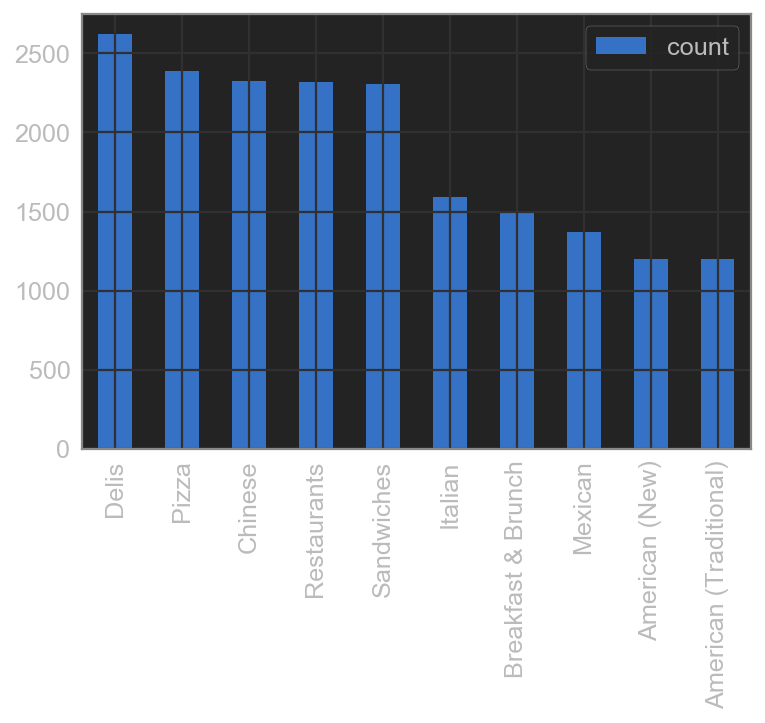

In [78]:
cat_count_restaurants.sort_values("count", ascending=False)[:10].plot.bar()

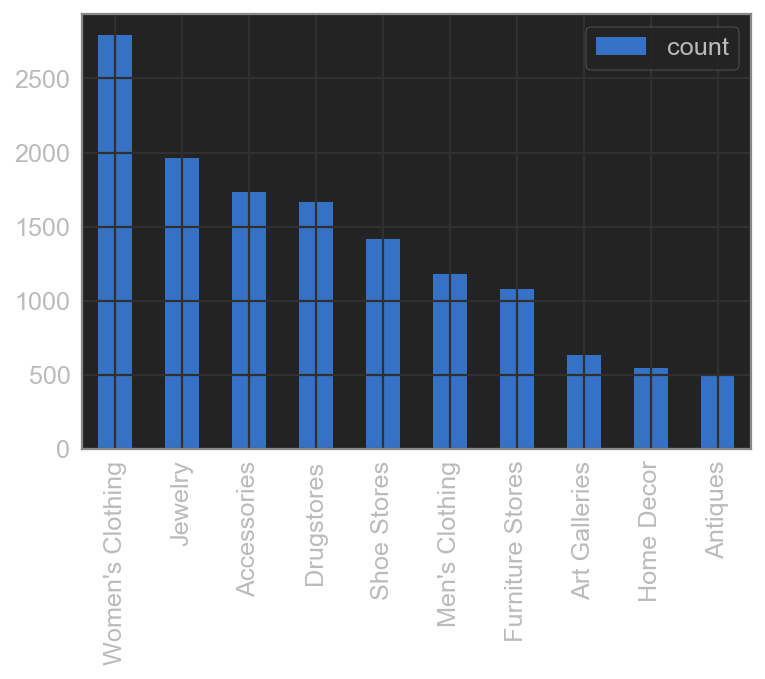

In [79]:
cat_count_shopping.sort_values("count", ascending=False)[:10].plot.bar()

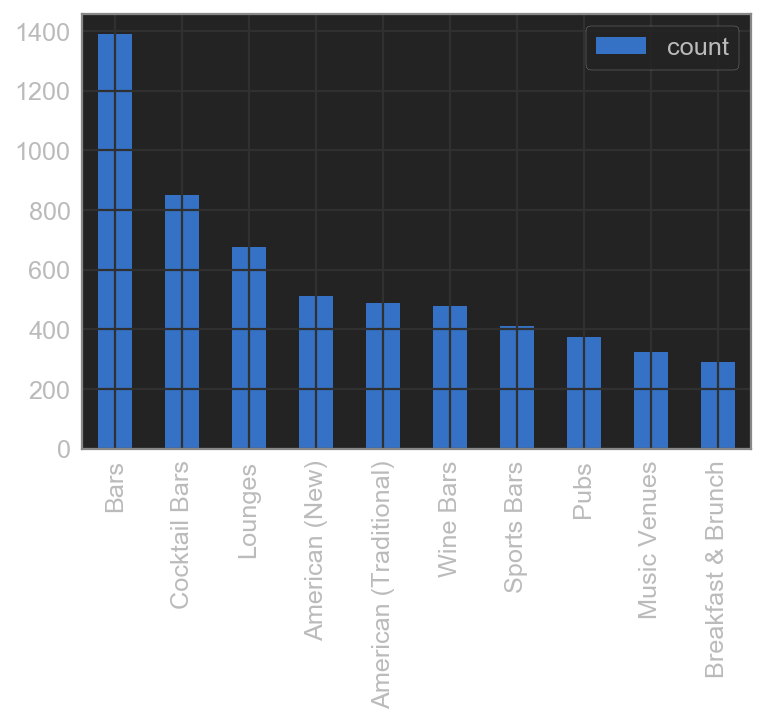

In [80]:
cat_count_nightlife.sort_values("count", ascending=False)[:10].plot.bar()

### 2.2 priceRange/dollarPrice

In [44]:
def append_dollarPriceNumeric(df):
    dollarPriceNumeric = []
    for dollarPrice in df["dollarPrice"]:
        if dollarPrice is not np.nan:
            dollarPriceNumeric.append(len(dollarPrice))
        else:
            dollarPriceNumeric.append(None)
    df["dollarPriceNumeric"] = dollarPriceNumeric
    return df

In [45]:
restaurants_nyc = append_dollarPriceNumeric(restaurants_nyc)
shopping_nyc = append_dollarPriceNumeric(shopping_nyc)
nightlife_nyc = append_dollarPriceNumeric(nightlife_nyc)

In [46]:
restaurants_nyc["dollarPriceNumeric"].describe()

count    16089.000000
mean         1.681894
std          0.654040
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: dollarPriceNumeric, dtype: float64

In [47]:
shopping_nyc["dollarPriceNumeric"].describe()

count    5569.000000
mean        2.191058
std         0.807507
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: dollarPriceNumeric, dtype: float64

In [48]:
nightlife_nyc["dollarPriceNumeric"].describe()

count    3952.000000
mean        2.011387
std         0.577676
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: dollarPriceNumeric, dtype: float64

### 2.3 rating/reviewCount

In [22]:
restaurants_nyc["rating"][restaurants_nyc["rating"] != -1].describe()

count    20036.000000
mean         3.341086
std          0.876759
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [23]:
restaurants_nyc["reviewCount"][restaurants_nyc["reviewCount"] != -1].describe()

count    20036.000000
mean       142.102765
std        317.390972
min          1.000000
25%          8.000000
50%         39.000000
75%        153.000000
max      10559.000000
Name: reviewCount, dtype: float64

### 2.5 latitude/longitude

Text(0.5, 1.0, 'Restaurants')

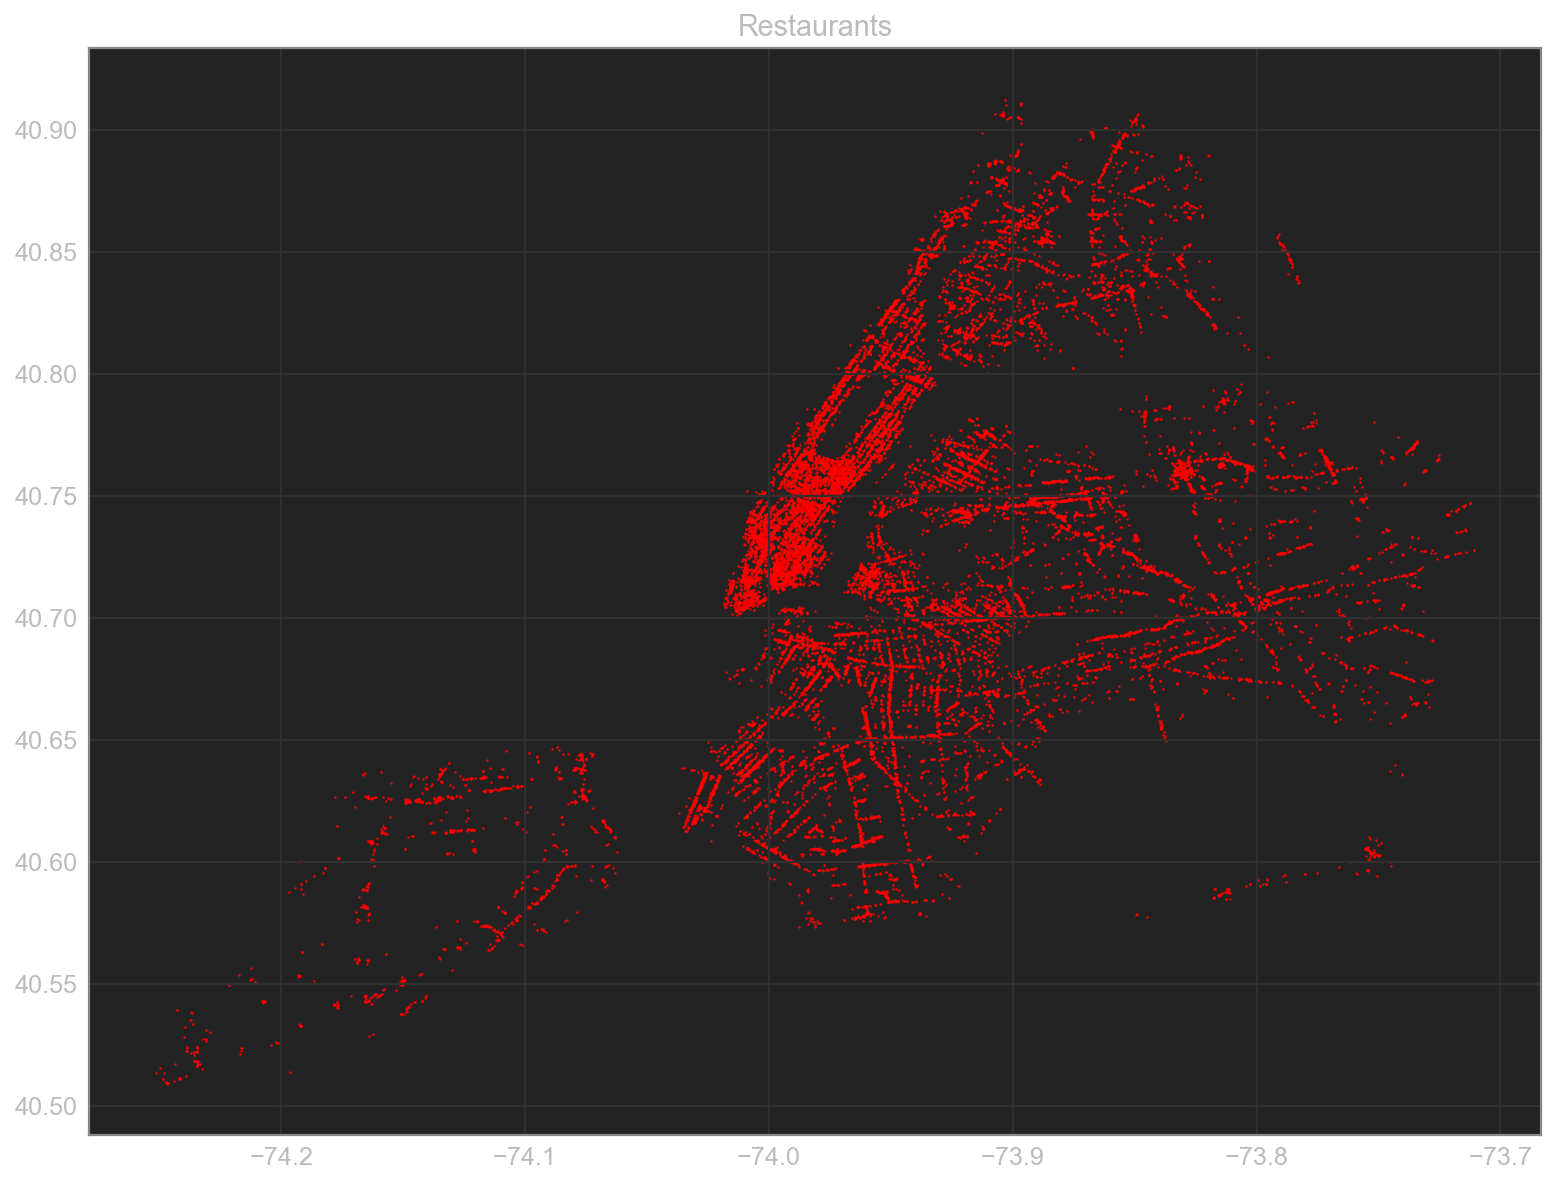

In [27]:
# restaurants
plt.figure(figsize=(20,10))
plt.scatter(restaurants_nyc["longitude"], restaurants_nyc["latitude"], s=1, c="red")
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Restaurants")

Text(0.5, 1.0, 'Shopping')

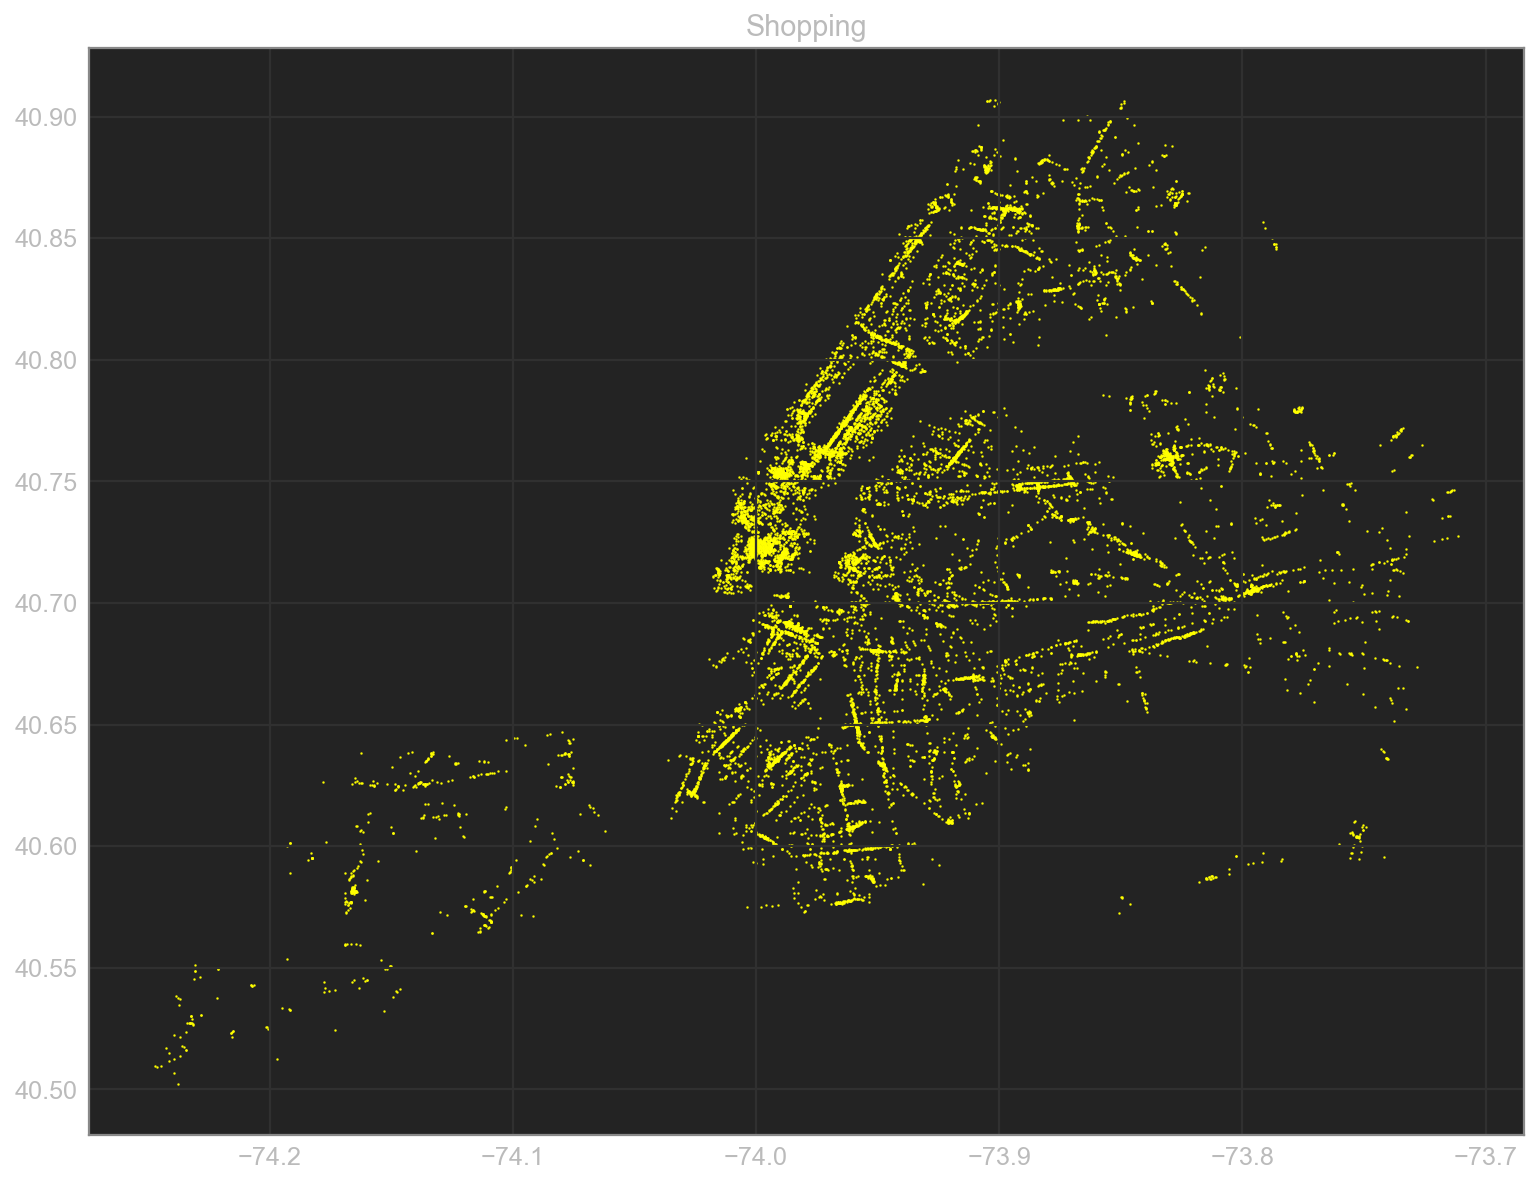

In [28]:
# shopping
plt.figure(figsize=(20,10))
plt.scatter(shopping_nyc["longitude"], shopping_nyc["latitude"], s=1, c="yellow")
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Shopping")

Text(0.5, 1.0, 'Nightlife')

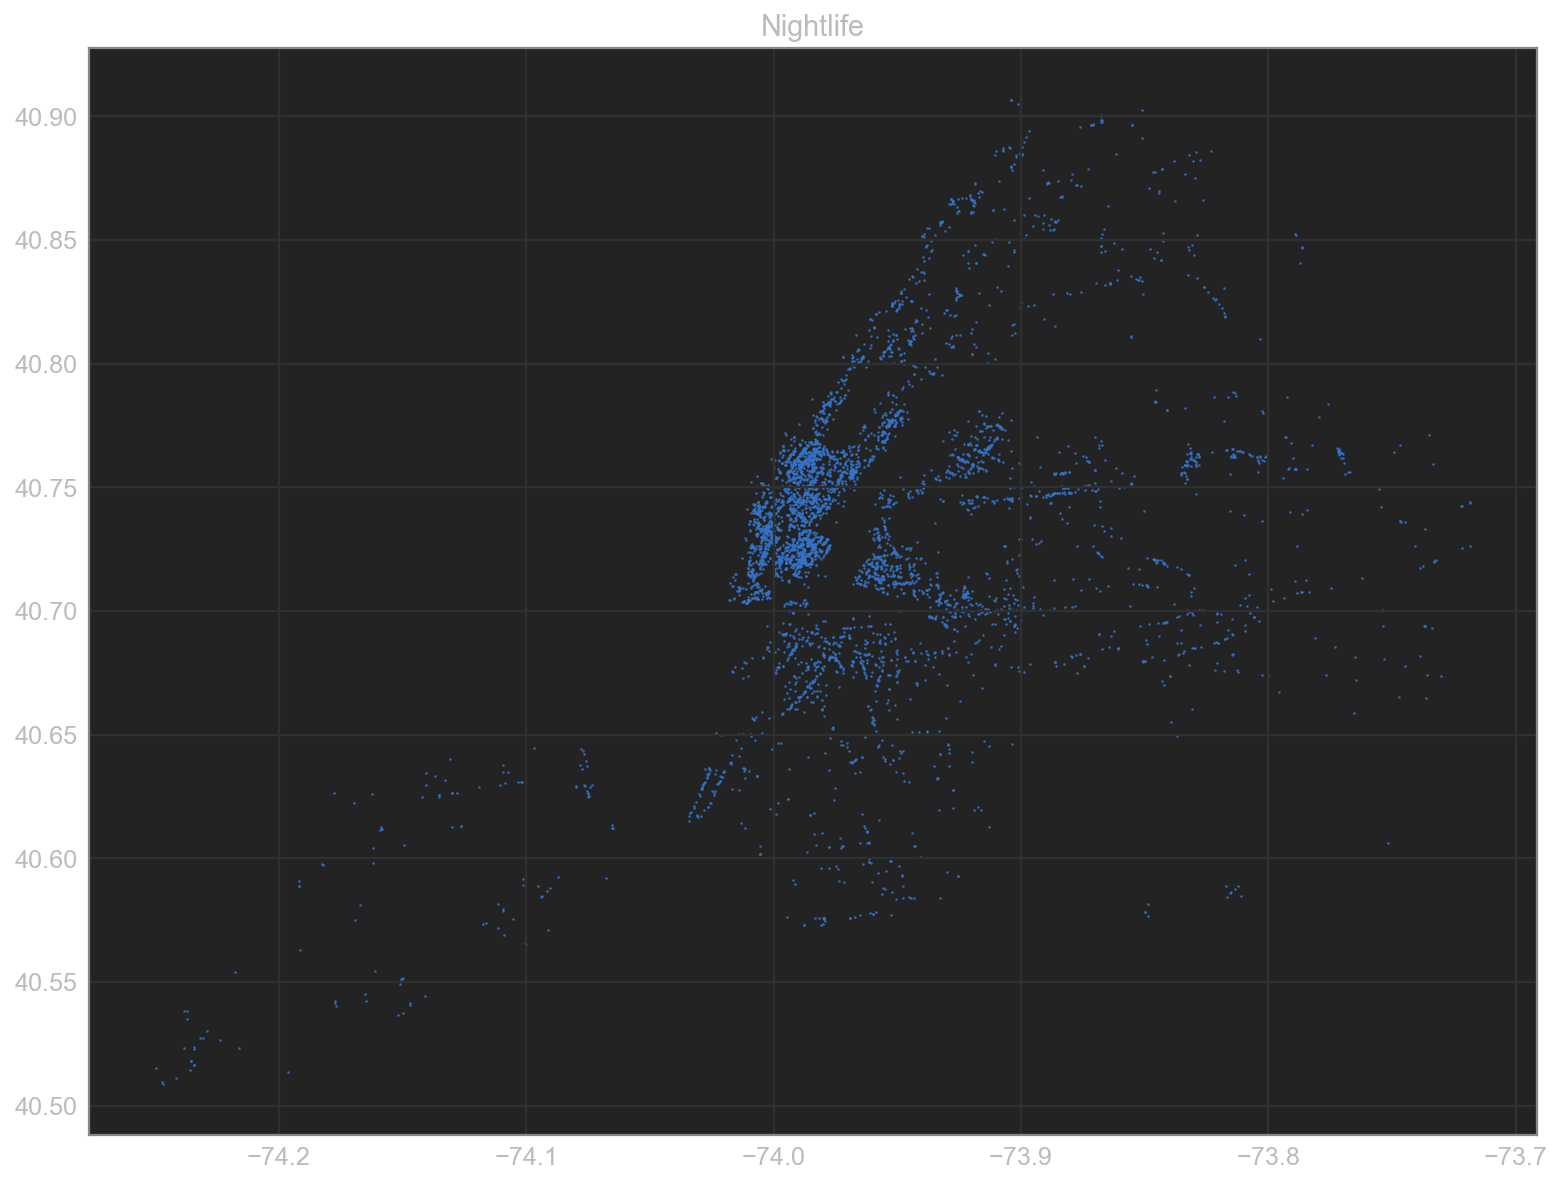

In [30]:
# nightlife
plt.figure(figsize=(20,10))
plt.scatter(nightlife_nyc["longitude"], nightlife_nyc["latitude"], s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Nightlife")

## 3 Feature relations with neightborhood

### 3.1 Count

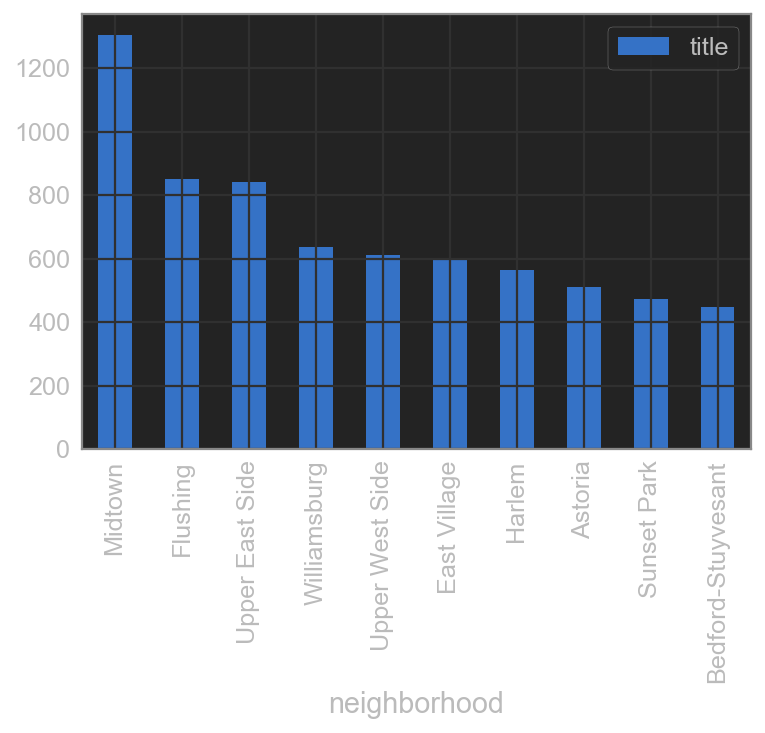

In [81]:
restaurants_nyc \
    .groupby(["neighborhood"]).agg({"title": "count"}) \
    .sort_values("title", ascending=False)[:10].plot.bar()

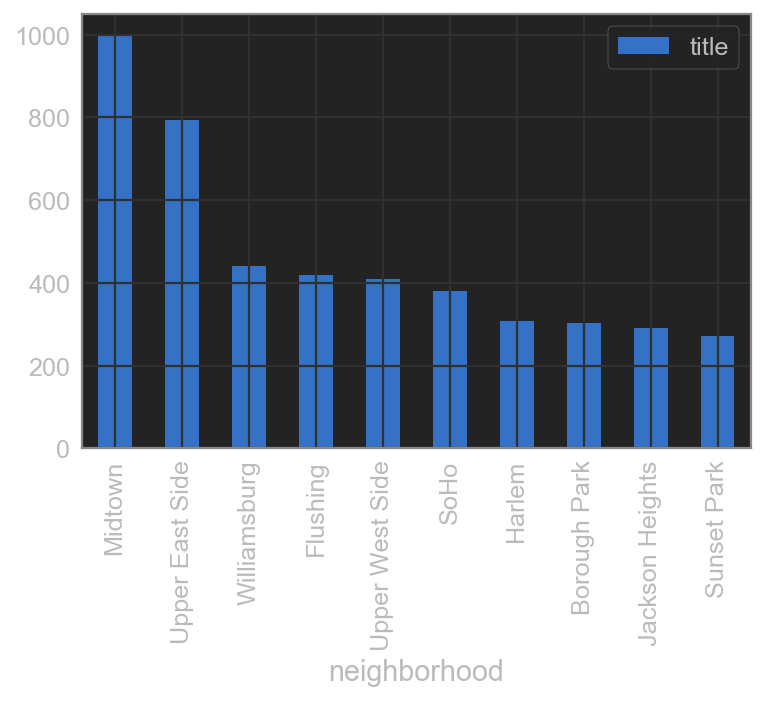

In [82]:
shopping_nyc \
    .groupby(["neighborhood"]).agg({"title": "count"}) \
    .sort_values("title", ascending=False)[:10].plot.bar()

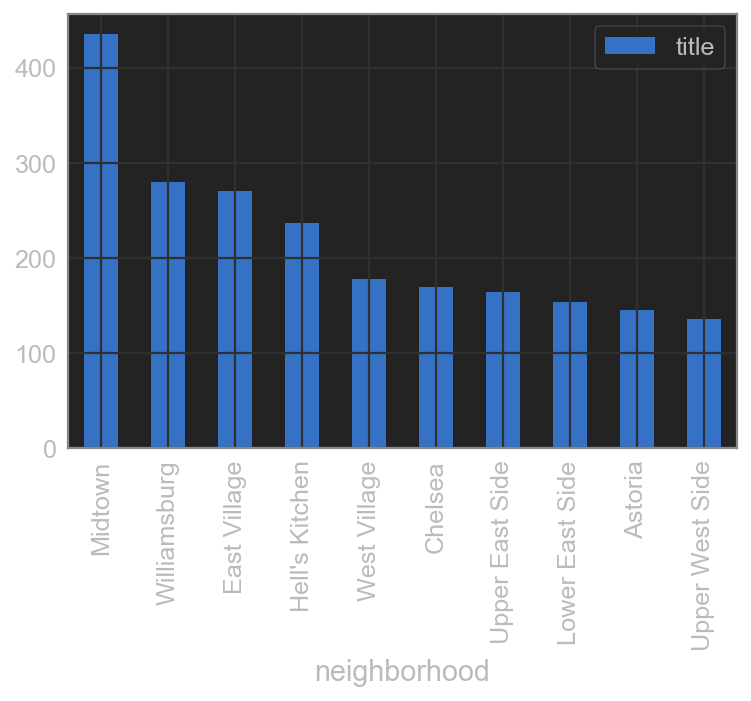

In [83]:
nightlife_nyc \
    .groupby(["neighborhood"]).agg({"title": "count"}) \
    .sort_values("title", ascending=False)[:10].plot.bar()

### 3.2 Density

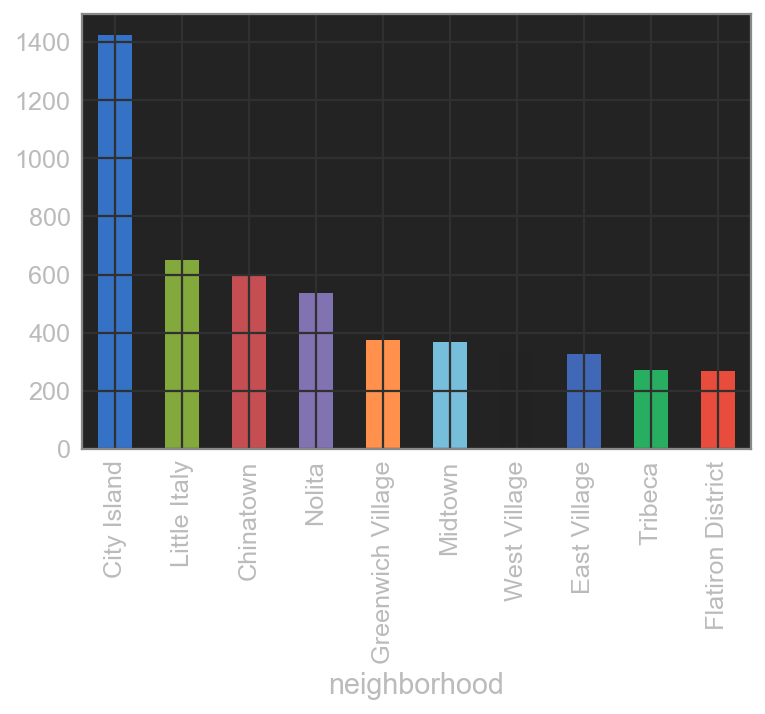

In [116]:
density_df = restaurants_nyc \
    .groupby(["neighborhood"]) \
    .agg({"title": "count"}) \
    .join(neighbourhoods_nyc.set_index("neighbourhood"), on="neighborhood")
density = density_df["title"] / density_df["area"]
density.sort_values(ascending=False)[1:11].plot.bar()

### 3.3 priceRange/dollarPrice

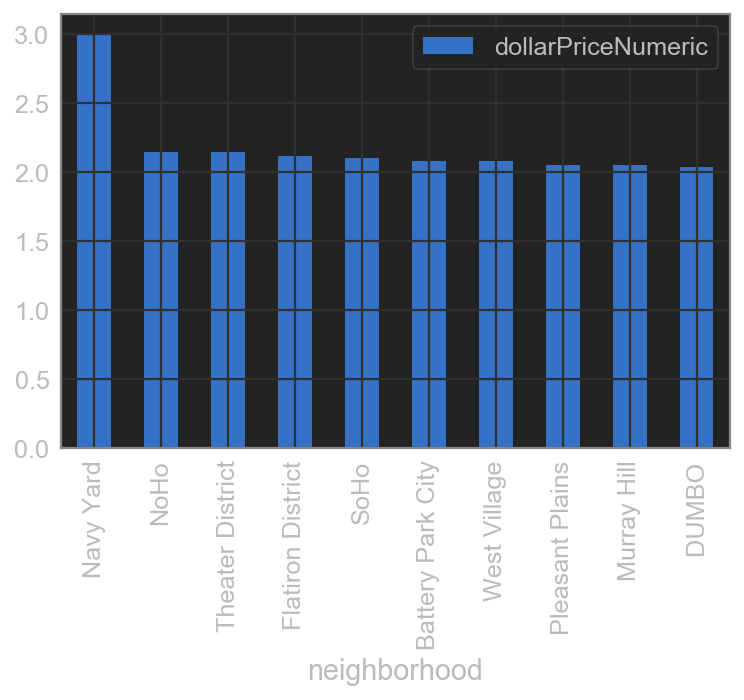

In [84]:
restaurants_nyc \
    .groupby(["neighborhood"]).agg({"dollarPriceNumeric": "mean"}) \
    .sort_values("dollarPriceNumeric", ascending=False)[:10].plot.bar()

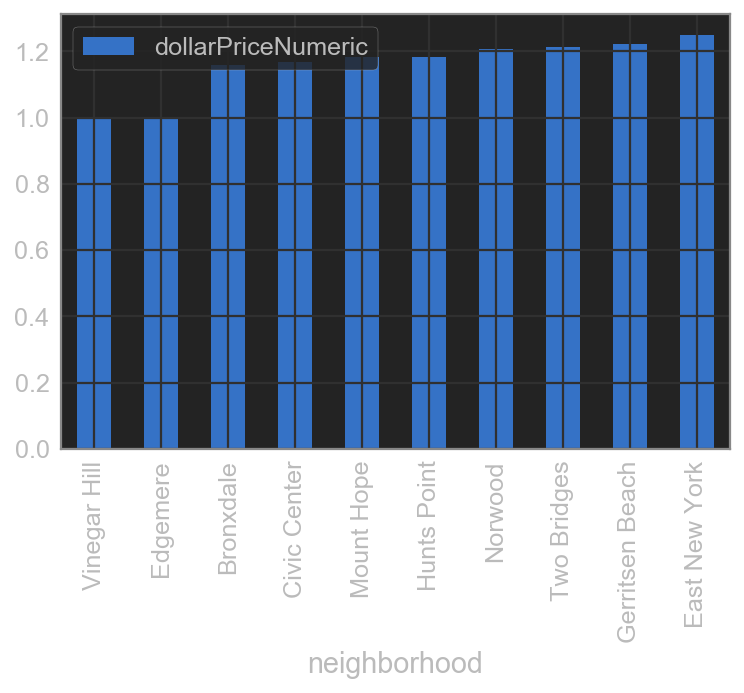

In [85]:
restaurants_nyc \
    .groupby(["neighborhood"]).agg({"dollarPriceNumeric": "mean"}) \
    .sort_values("dollarPriceNumeric", ascending=True)[:10].plot.bar()

### 3.4 rating/reviewCount

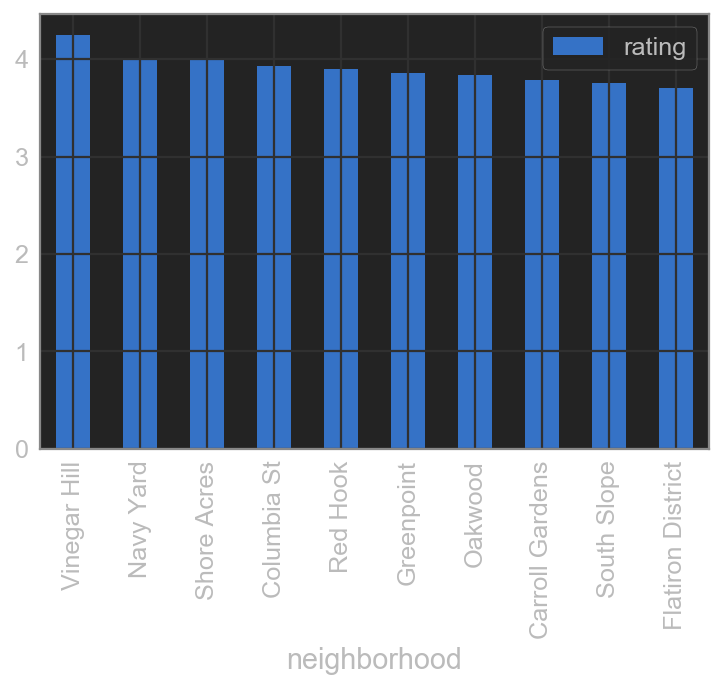

In [86]:
restaurants_nyc[restaurants_nyc["rating"] != -1] \
    .groupby(["neighborhood"]).agg({"rating": "mean"}) \
    .sort_values("rating", ascending=False)[:10].plot.bar()

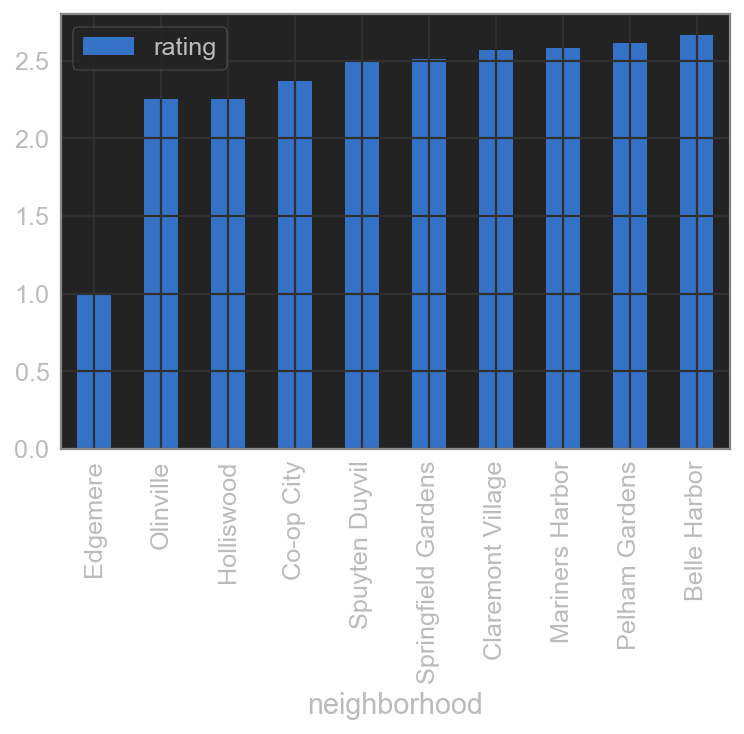

In [87]:
restaurants_nyc[restaurants_nyc["rating"] != -1] \
    .groupby(["neighborhood"]).agg({"rating": "mean"}) \
    .sort_values("rating", ascending=True)[:10].plot.bar()

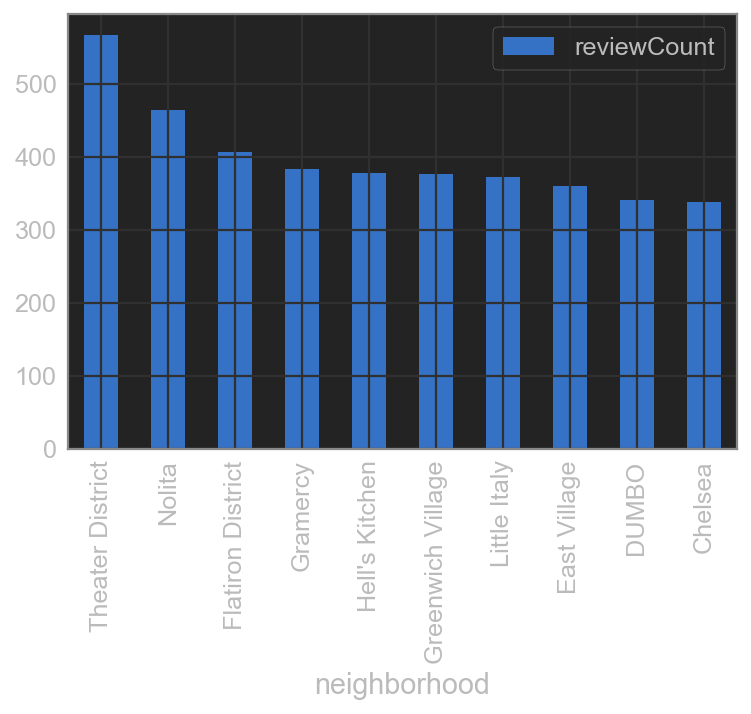

In [88]:
restaurants_nyc[restaurants_nyc["reviewCount"] != -1] \
    .groupby(["neighborhood"]).agg({"reviewCount": "mean"}) \
    .sort_values("reviewCount", ascending=False)[:10].plot.bar()

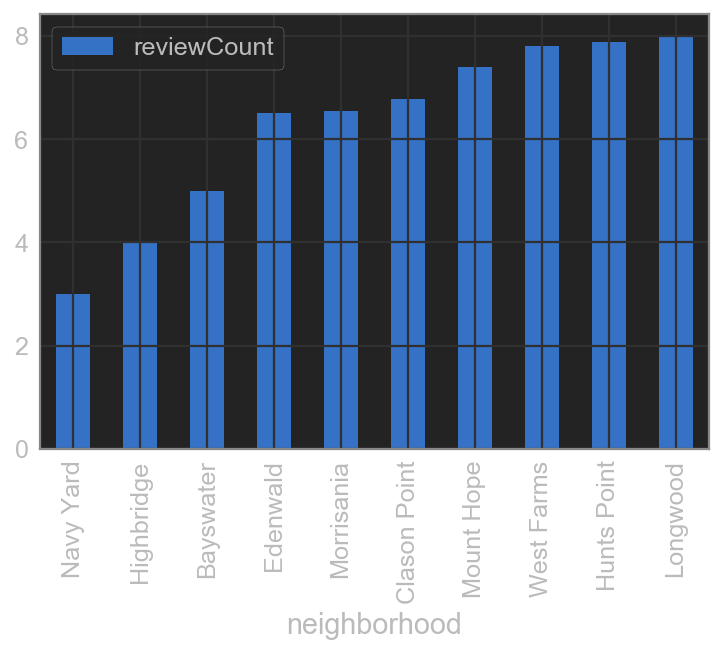

In [89]:
restaurants_nyc[restaurants_nyc["reviewCount"] != -1] \
    .groupby(["neighborhood"]).agg({"reviewCount": "mean"}) \
    .sort_values("reviewCount", ascending=True)[:10].plot.bar()